In [14]:
import numpy as np
import pandas as pd

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
import matplotlib.pyplot as plt

In [17]:
import tensorflow as tf

In [18]:
DUST_DF_DICT={}
for year in range(2013, 2018):
    filename = f'{year}.csv'
    DUST_DF_DICT[f'DUST_{year}'] = pd.read_csv(filename, encoding='EUC_KR')

In [19]:
dust2017=DUST_DF_DICT['DUST_2017'].copy()
JSDong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']=='지산동').dropna().index]
JSDong

측정소명     년   월   일   시    SO2  PM10  PM25     O3    NO2   CO
1      지산동  2017   1   1   1  0.003    41    30  0.004  0.054  0.6
12     지산동  2017   1   1   2  0.003    31    30  0.004  0.052  0.6
23     지산동  2017   1   1   3  0.003    33    30  0.003  0.055  0.6
34     지산동  2017   1   1   4  0.003    33    27  0.003  0.053  0.6
45     지산동  2017   1   1   5  0.003    31    34  0.003  0.049  0.6
...    ...   ...  ..  ..  ..    ...   ...   ...    ...    ...  ...
96415  지산동  2017  12  31  20  0.004    76    27  0.031  0.020  0.4
96428  지산동  2017  12  31  21  0.004    66    22  0.028  0.021  0.4
96441  지산동  2017  12  31  22  0.004    65    25  0.033  0.016  0.3
96454  지산동  2017  12  31  23  0.004    58    21  0.031  0.017  0.4
96467  지산동  2017  12  31  24  0.004    53    18  0.030  0.017  0.4

[8760 rows x 11 columns]

In [20]:
dust2016 = DUST_DF_DICT['DUST_2016'].copy()
JSDong2=dust2016.loc[dust2016['측정소명'].where(dust2016['측정소명']=='지산동').dropna().index]
JSDong2['PM10_res'] = JSDong2['PM10'].shift(-1)
JSDong2 = JSDong2[:-1]
JSDong2

측정소명     년   월   일   시    SO2  PM10   PM25     O3    NO2   CO  PM10_res
1      지산동  2016   1   1   1  0.004    82   60.0  0.002  0.038  0.6      76.0
12     지산동  2016   1   1   2  0.003    76   65.0  0.002  0.037  0.6      76.0
23     지산동  2016   1   1   3  0.003    76  120.0  0.002  0.034  0.7      74.0
34     지산동  2016   1   1   4  0.004    74   63.0  0.002  0.033  0.7      80.0
45     지산동  2016   1   1   5  0.003    80   61.0  0.002  0.030  0.7      84.0
...    ...   ...  ..  ..  ..    ...   ...    ...    ...    ...  ...       ...
96559  지산동  2016  12  31  19  0.003    33   26.0  0.015  0.050  0.4      31.0
96570  지산동  2016  12  31  20  0.004    31   27.0  0.006  0.070  0.6      45.0
96581  지산동  2016  12  31  21  0.004    45   33.0  0.005  0.075  0.6      45.0
96592  지산동  2016  12  31  22  0.004    45   36.0  0.002  0.084  0.6      41.0
96603  지산동  2016  12  31  23  0.004    41   34.0  0.002  0.085  0.7      47.0

[8783 rows x 12 columns]

In [21]:
JSDong['PM10_res']=JSDong['PM10'].shift(-1)
JSDong['PM25_res']=JSDong['PM25'].shift(-1)
JSDong

측정소명     년   월   일   시    SO2  PM10  PM25     O3    NO2   CO  PM10_res  \
1      지산동  2017   1   1   1  0.003    41    30  0.004  0.054  0.6      31.0   
12     지산동  2017   1   1   2  0.003    31    30  0.004  0.052  0.6      33.0   
23     지산동  2017   1   1   3  0.003    33    30  0.003  0.055  0.6      33.0   
34     지산동  2017   1   1   4  0.003    33    27  0.003  0.053  0.6      31.0   
45     지산동  2017   1   1   5  0.003    31    34  0.003  0.049  0.6      33.0   
...    ...   ...  ..  ..  ..    ...   ...   ...    ...    ...  ...       ...   
96415  지산동  2017  12  31  20  0.004    76    27  0.031  0.020  0.4      66.0   
96428  지산동  2017  12  31  21  0.004    66    22  0.028  0.021  0.4      65.0   
96441  지산동  2017  12  31  22  0.004    65    25  0.033  0.016  0.3      58.0   
96454  지산동  2017  12  31  23  0.004    58    21  0.031  0.017  0.4      53.0   
96467  지산동  2017  12  31  24  0.004    53    18  0.030  0.017  0.4       NaN   

       PM25_res  
1          30.0  
12         30.0  
23         27.0  
34         34.0  
45         32.0  
...         ...  
96415      22.0  
96428      25.0  
96441      21.0  
96454      18.0  
96467       NaN  

[8760 rows x 13 columns]

In [22]:
#한칸 밀었으니 마지막줄 없애버리기 
#-> 데이터셋 기본 전처리(1시간 후 PM10 갖다 붙이기) 완료.
JSDong=JSDong[:-1]
JSDong

측정소명     년   월   일   시    SO2  PM10  PM25     O3    NO2   CO  PM10_res  \
1      지산동  2017   1   1   1  0.003    41    30  0.004  0.054  0.6      31.0   
12     지산동  2017   1   1   2  0.003    31    30  0.004  0.052  0.6      33.0   
23     지산동  2017   1   1   3  0.003    33    30  0.003  0.055  0.6      33.0   
34     지산동  2017   1   1   4  0.003    33    27  0.003  0.053  0.6      31.0   
45     지산동  2017   1   1   5  0.003    31    34  0.003  0.049  0.6      33.0   
...    ...   ...  ..  ..  ..    ...   ...   ...    ...    ...  ...       ...   
96402  지산동  2017  12  31  19  0.003    91    22  0.030  0.023  0.4      76.0   
96415  지산동  2017  12  31  20  0.004    76    27  0.031  0.020  0.4      66.0   
96428  지산동  2017  12  31  21  0.004    66    22  0.028  0.021  0.4      65.0   
96441  지산동  2017  12  31  22  0.004    65    25  0.033  0.016  0.3      58.0   
96454  지산동  2017  12  31  23  0.004    58    21  0.031  0.017  0.4      53.0   

       PM25_res  
1          30.0  
12         30.0  
23         27.0  
34         34.0  
45         32.0  
...         ...  
96402      27.0  
96415      22.0  
96428      25.0  
96441      21.0  
96454      18.0  

[8759 rows x 13 columns]

In [23]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10) 
X = JSDong[['PM10']].copy()
y = JSDong[['PM10_res']].copy()

In [24]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# (현재 PM10), (1시간 후 PM10) 두 가지로 단순 선형회귀
# 이후 점수 확인. -> 결과 개판
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4742918599029764

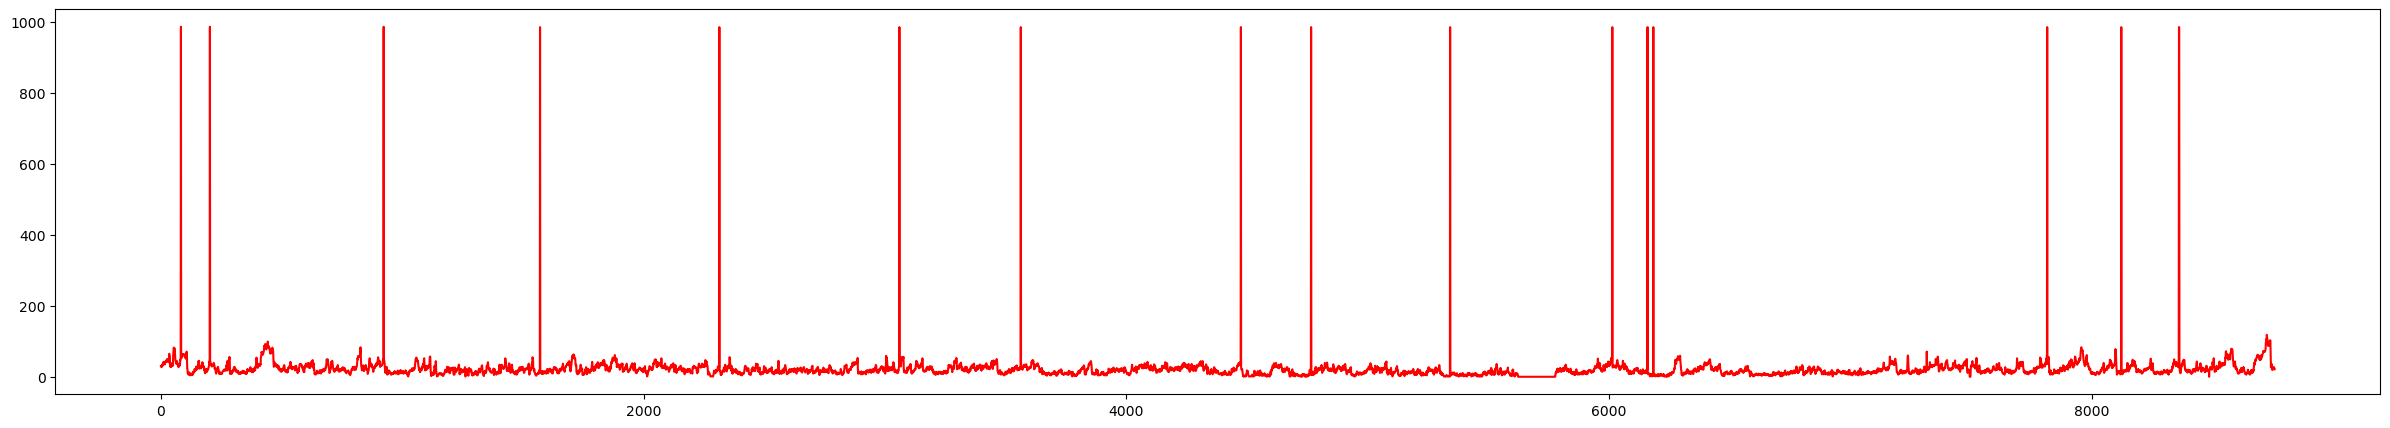

In [26]:
plt.figure(figsize=(30, 5))
plt.plot(JSDong[['PM25']].reset_index().index, JSDong[['PM25']].reset_index()['PM25'], color='red')
#plt.plot(X.reset_index().index, model.predict(X), color='blue',)

plt.show()

/Users/geonhyo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


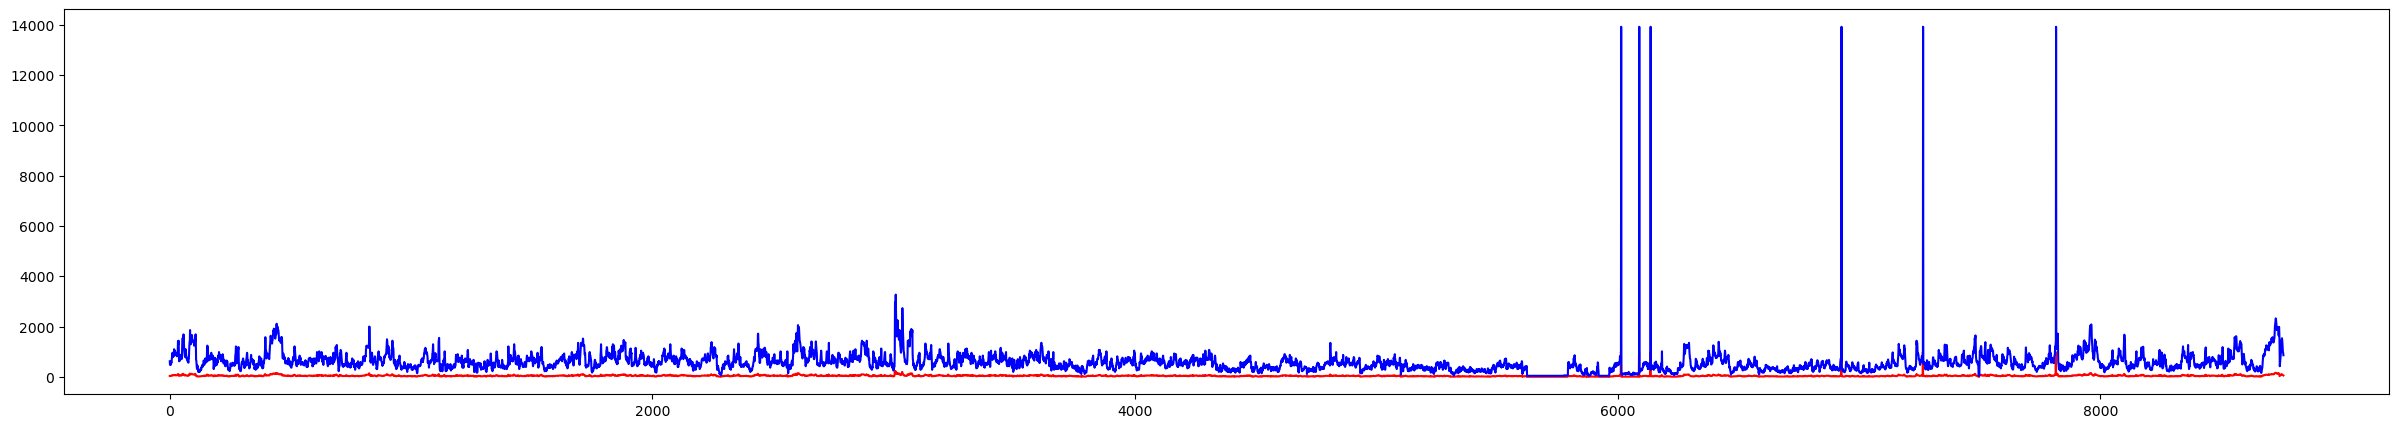

In [27]:
plt.figure(figsize=(30, 5))
plt.plot(X.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(X.reset_index().index, model.predict(X), color='blue',)

plt.show()

48/48 [==============================] - 0s 294us/step


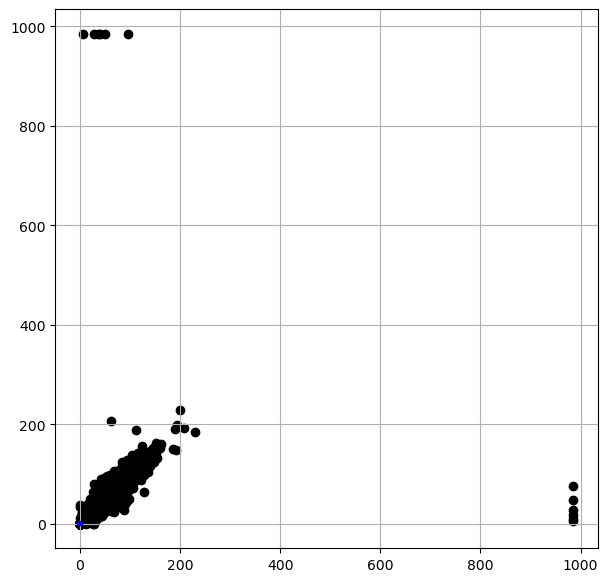

In [128]:
#어떻게 회귀가 되었는지 그래프를 그려보기.
plt.figure(figsize=(7, 7))
plt.grid(True)
plt.scatter(JSDong['PM10'], JSDong['PM10_res'],  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.show()

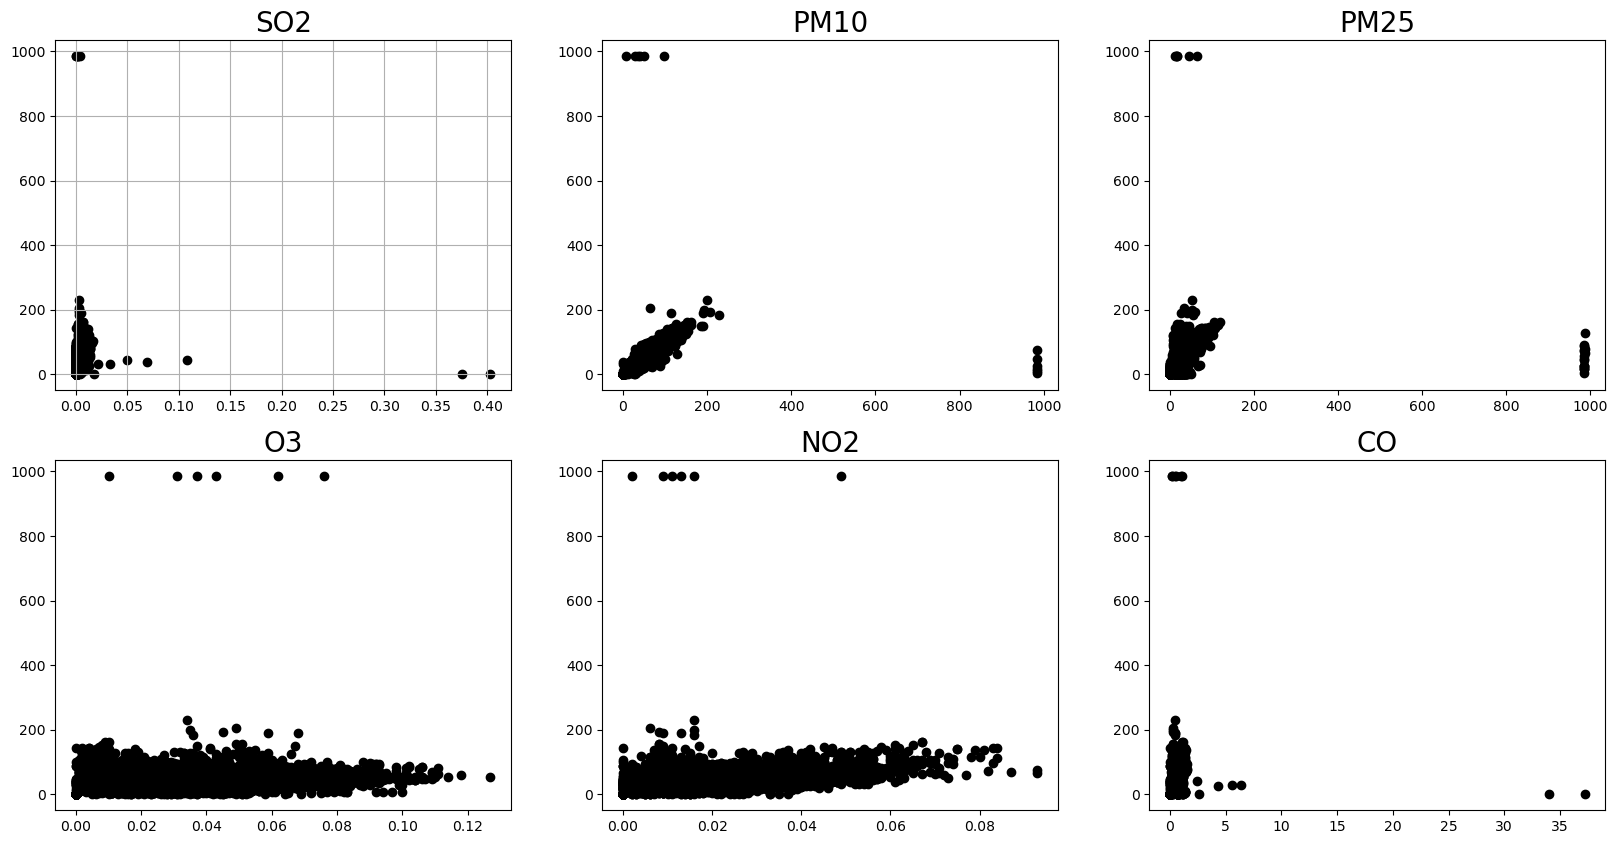

In [29]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.grid(True)
plt.scatter(JSDong['SO2'], JSDong['PM10_res'],  color='black')

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.scatter(JSDong['PM10'], JSDong['PM10_res'],  color='black')

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.scatter(JSDong['PM25'], JSDong['PM10_res'],  color='black')

plt.subplot(234)
plt.title('O3', size = 20,)
plt.scatter(JSDong['O3'], JSDong['PM10_res'],  color='black')

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.scatter(JSDong['NO2'], JSDong['PM10_res'],  color='black')

plt.subplot(236)
plt.title('CO', size = 20,)
plt.scatter(JSDong['CO'], JSDong['PM10_res'],  color='black')
plt.show()

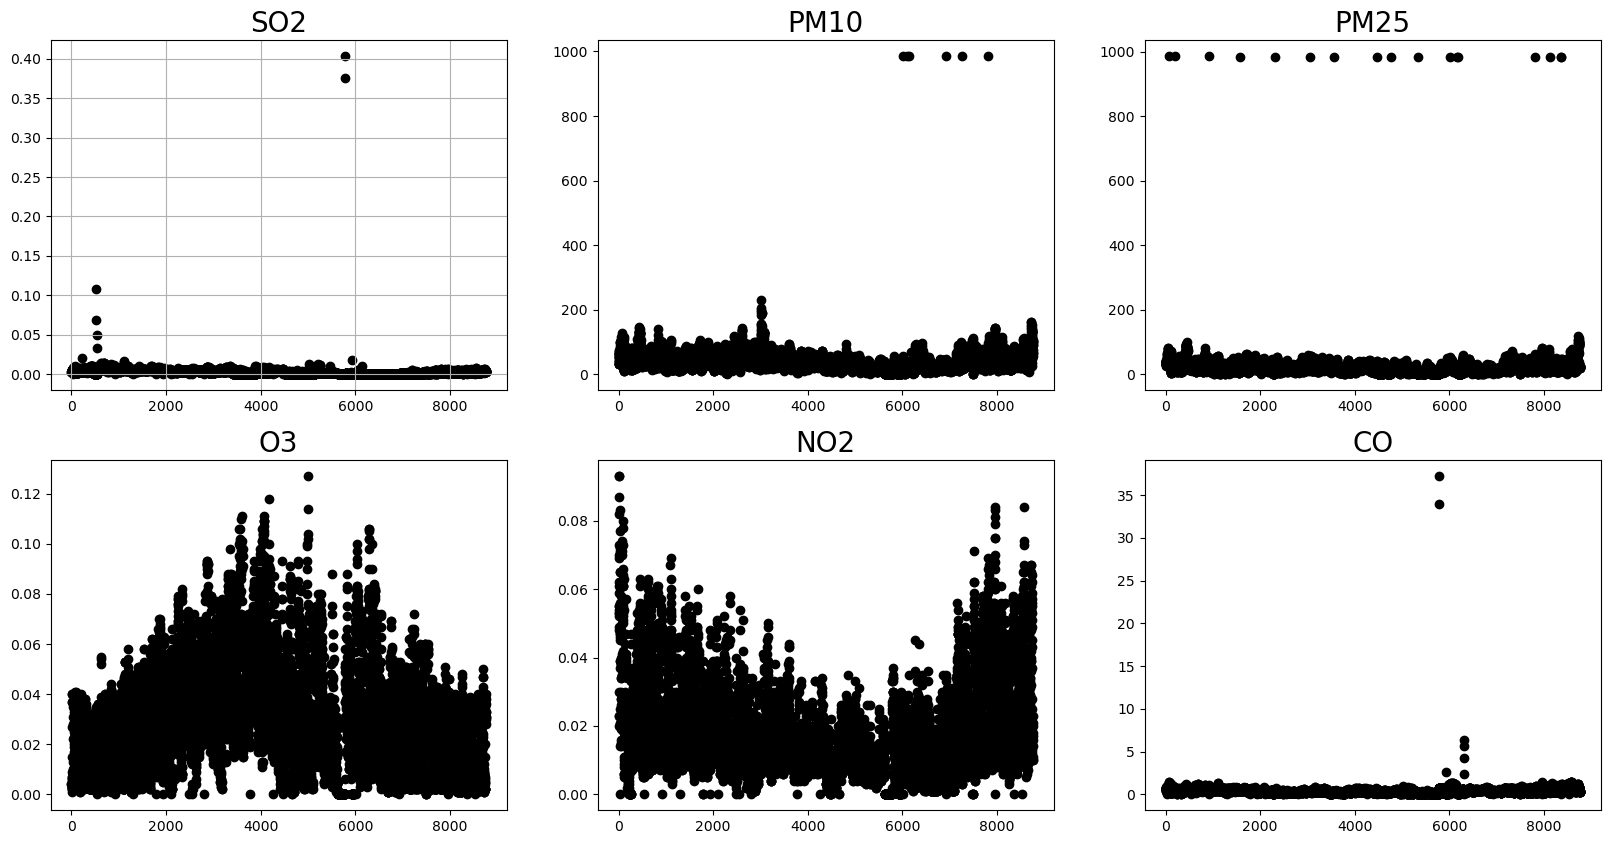

In [30]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.grid(True)
plt.scatter(JSDong.reset_index().index, JSDong['SO2'],  color='black')

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.scatter(JSDong.reset_index().index, JSDong['PM10'],  color='black')

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.scatter(JSDong.reset_index().index, JSDong['PM25'],  color='black')

plt.subplot(234)
plt.title('O3', size = 20,)
plt.scatter(JSDong.reset_index().index, JSDong['O3'],  color='black')

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.scatter(JSDong.reset_index().index, JSDong['NO2'],  color='black')

plt.subplot(236)
plt.title('CO', size = 20,)
plt.scatter(JSDong.reset_index().index, JSDong['CO'],  color='black')
plt.show()

In [31]:
#PM10 400이상 & 0 날리기
JSDong_drop = JSDong[ (JSDong['PM10']<400) & (JSDong['PM10_res']<400) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['PM10']!=0) & (JSDong_drop['PM10_res']!=0) ]
#PM10 400이상 & 0 날리기
JSDong_drop = JSDong_drop[ (JSDong_drop['PM25']<400) & (JSDong_drop['PM25_res']<400) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['PM25']!=0) & (JSDong_drop['PM25_res']!=0) ]

In [32]:
#PM10 400이상 & 0 날리기
JSDong_drop2 = JSDong2[(JSDong2['PM10']<400) & (JSDong2['PM10_res']<400) ]
JSDong_drop2 = JSDong_drop2[ (JSDong_drop2['PM10']!=0) & (JSDong_drop2['PM10_res']!=0) ]

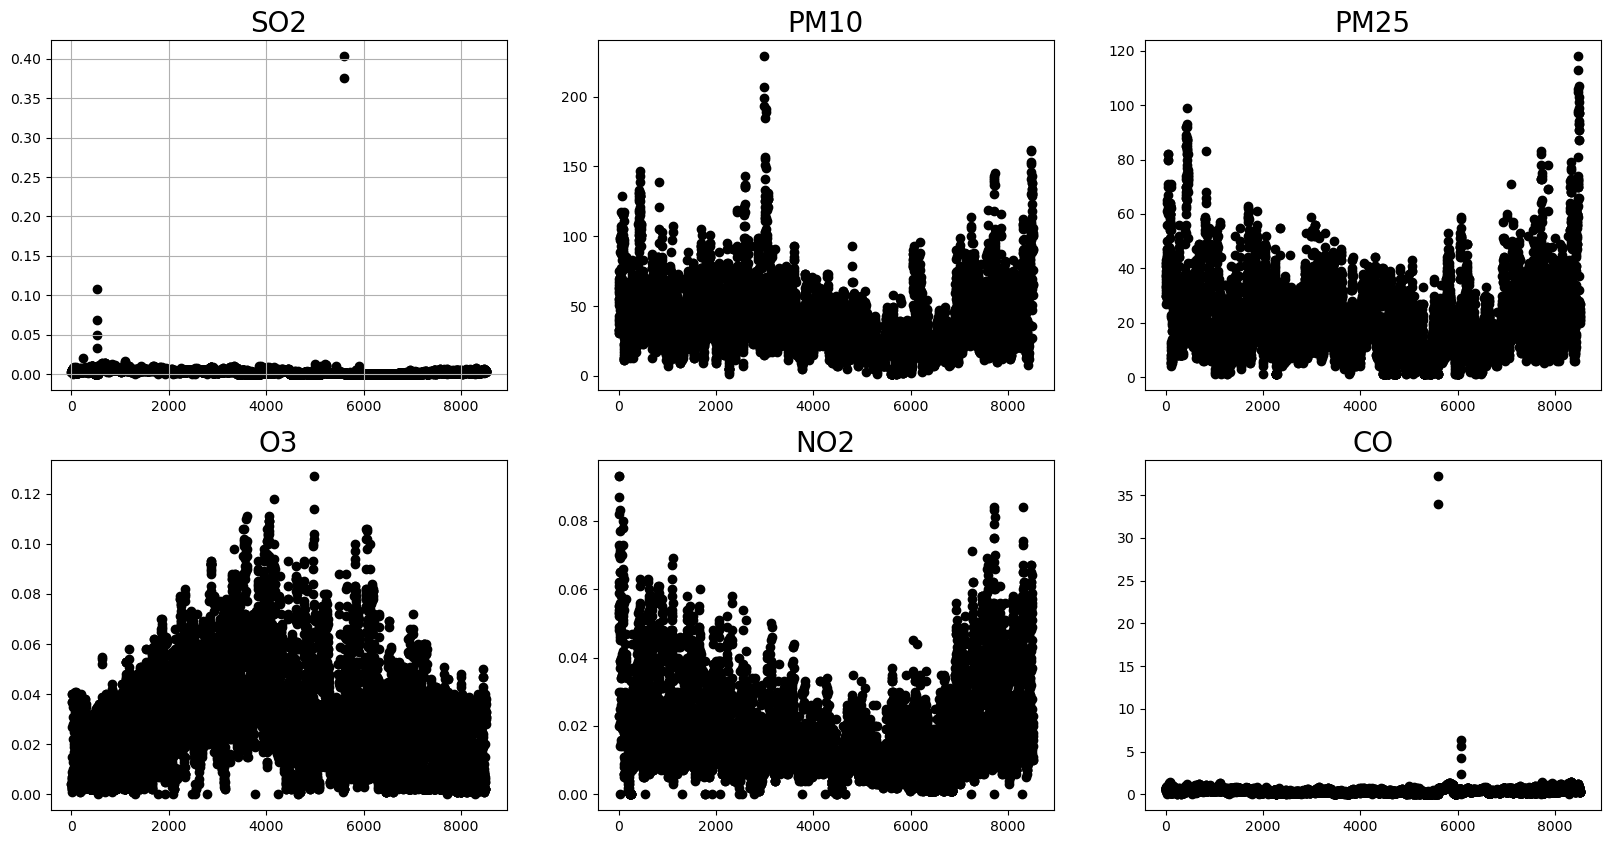

In [33]:
#CO에 이상 있는거 확인하기. 센서 고장으로 추정됨.
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.grid(True)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['SO2'],  color='black')

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['PM10'],  color='black')

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['PM25'],  color='black')

plt.subplot(234)
plt.title('O3', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['O3'],  color='black')

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['NO2'],  color='black')

plt.subplot(236)
plt.title('CO', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['CO'],  color='black')
plt.show()

In [34]:
#PM10 400이상 & 0 날리기
JSDong_drop = JSDong[ (JSDong['PM10']<400) & (JSDong['PM10_res']<400) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['PM10']!=0) & (JSDong_drop['PM10_res']!=0) ]
#PM10 400이상 & 0 날리기
JSDong_drop = JSDong_drop[ (JSDong_drop['PM25']<400) & (JSDong_drop['PM25_res']<400) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['PM25']!=0) & (JSDong_drop['PM25_res']!=0) ]
#기타 대기 인자 0 날리기
JSDong_drop = JSDong_drop[ (JSDong_drop['SO2']!=0) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['O3']!=0) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['NO2']!=0) ]
JSDong_drop = JSDong_drop[ (JSDong_drop['CO']!=0) ]

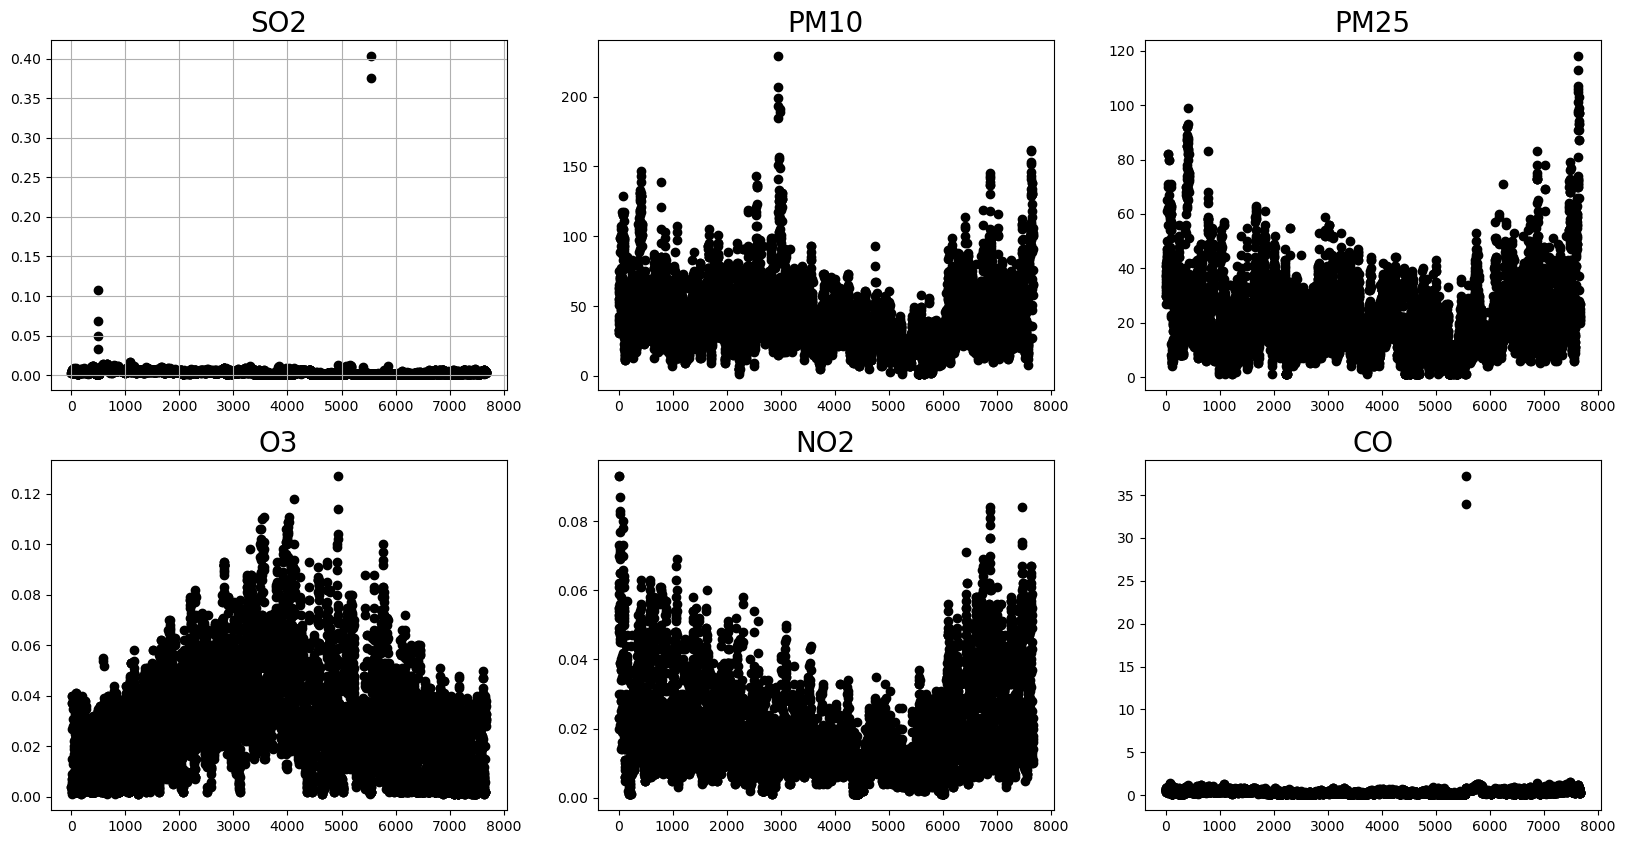

In [35]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.grid(True)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['SO2'],  color='black')

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['PM10'],  color='black')

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['PM25'],  color='black')

plt.subplot(234)
plt.title('O3', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['O3'],  color='black')

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['NO2'],  color='black')

plt.subplot(236)
plt.title('CO', size = 20,)
plt.scatter(JSDong_drop.reset_index().index, JSDong_drop['CO'],  color='black')
plt.show()

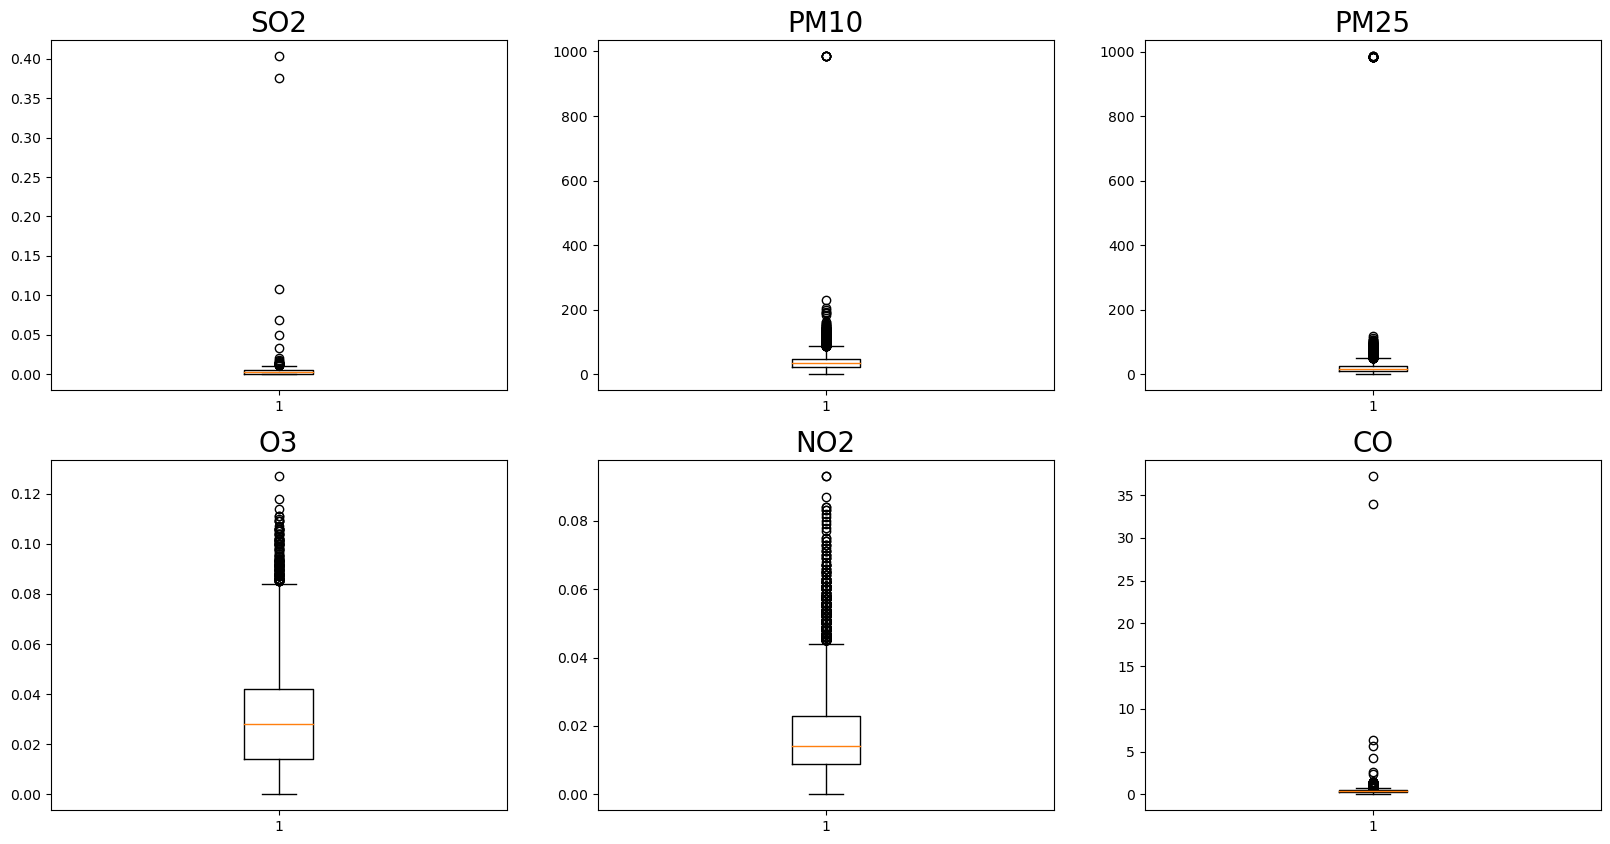

In [36]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.boxplot(JSDong['SO2'])

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.boxplot(JSDong['PM10'])

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.boxplot(JSDong['PM25'])

plt.subplot(234)
plt.title('O3', size = 20,)
plt.boxplot(JSDong['O3'])

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.boxplot(JSDong['NO2'])

plt.subplot(236)
plt.title('CO', size = 20,)
plt.boxplot(JSDong['CO'])
plt.show()

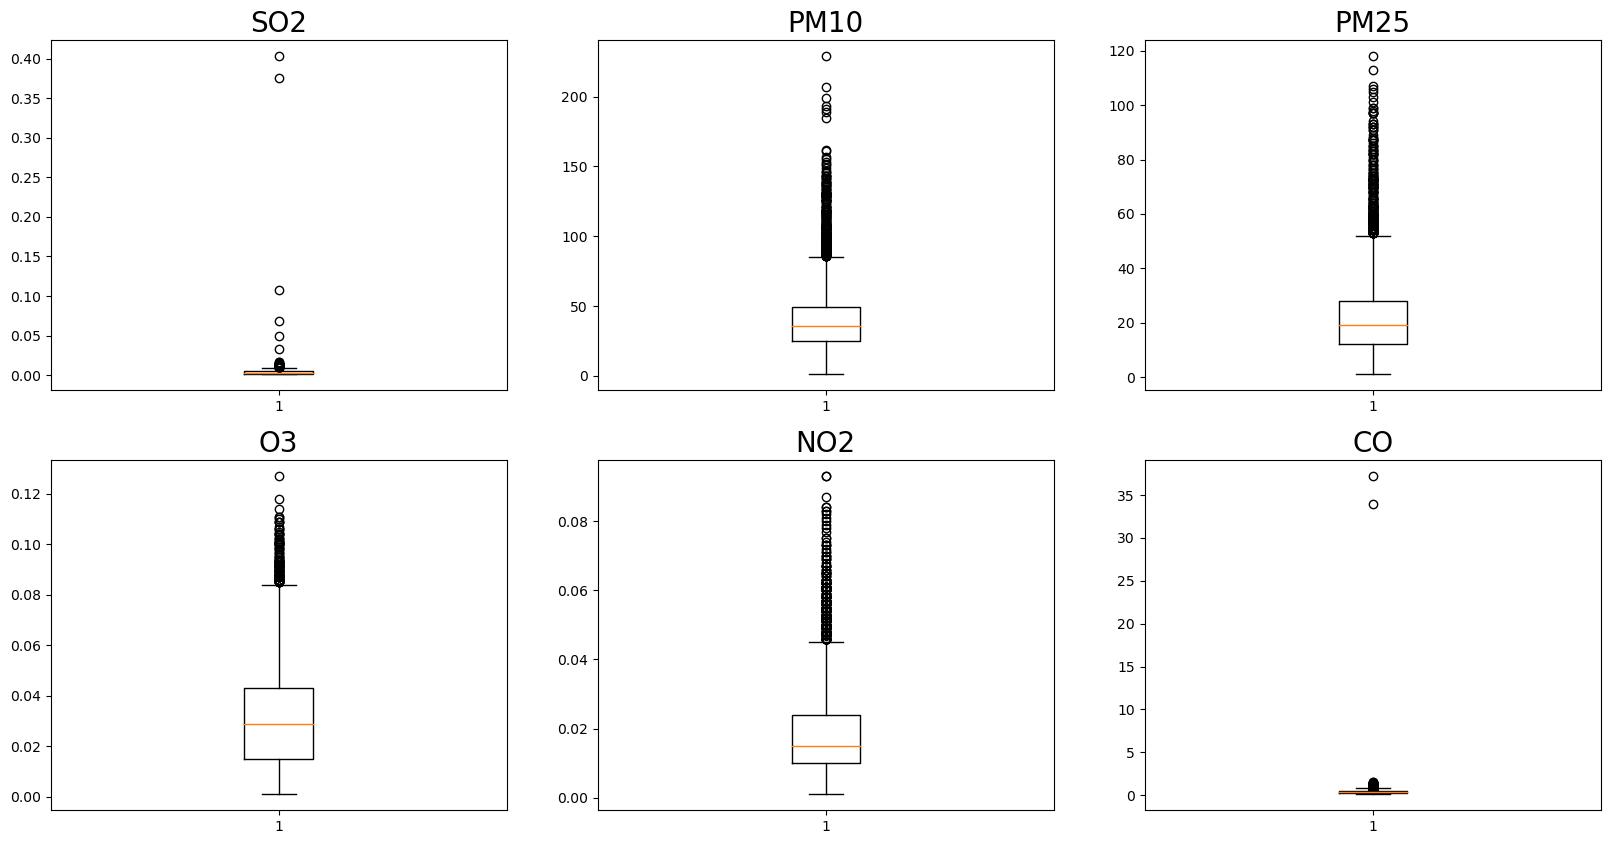

In [37]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('SO2', size = 20,)
plt.boxplot(JSDong_drop['SO2'])

plt.subplot(232)
plt.title('PM10', size = 20,)
plt.boxplot(JSDong_drop['PM10'])

plt.subplot(233)
plt.title('PM25', size = 20,)
plt.boxplot(JSDong_drop['PM25'])

plt.subplot(234)
plt.title('O3', size = 20,)
plt.boxplot(JSDong_drop['O3'])

plt.subplot(235)
plt.title('NO2', size = 20,)
plt.boxplot(JSDong_drop['NO2'])

plt.subplot(236)
plt.title('CO', size = 20,)
plt.boxplot(JSDong_drop['CO'])
plt.show()

In [38]:
#처리후 선형회귀
JSDong_drop.head(3)

측정소명     년  월  일  시    SO2  PM10  PM25     O3    NO2   CO  PM10_res  \
1   지산동  2017  1  1  1  0.003    41    30  0.004  0.054  0.6      31.0   
12  지산동  2017  1  1  2  0.003    31    30  0.004  0.052  0.6      33.0   
23  지산동  2017  1  1  3  0.003    33    30  0.003  0.055  0.6      33.0   

    PM25_res  
1       30.0  
12      30.0  
23      27.0

In [127]:
len(dust)

96479

In [40]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10) 
X = JSDong_drop[['PM10']].copy()
y = JSDong_drop[['PM10_res']].copy()

In [41]:
X2 = JSDong_drop[['PM10']].copy()

In [42]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8595005184887562

In [43]:
model.predict([[1], [max(JSDong_drop['PM10'])]])

/Users/geonhyo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[  3.50529105],
       [216.55357124]])

In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(JSDong_drop['PM10'], model.predict(X))
rmse = np.sqrt(mse)
rmse

1.4822312539116413

/Users/geonhyo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


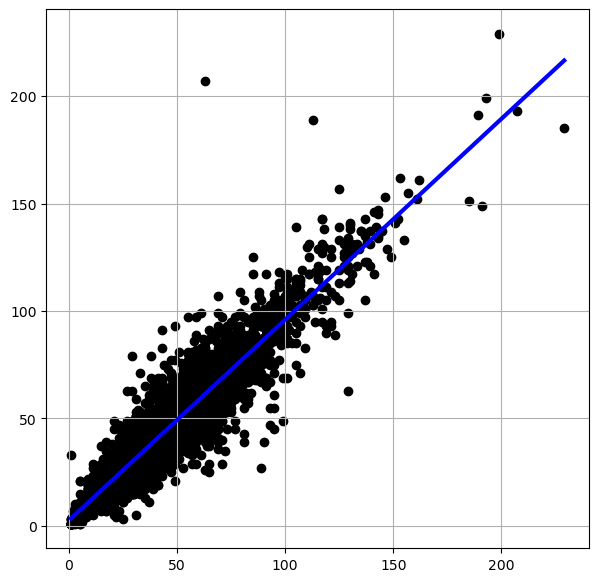

In [45]:
plt.figure(figsize=(7, 7))
plt.grid(True)

plt.scatter(JSDong_drop['PM10'], JSDong_drop['PM10_res'],  color='black')
linex = np.array([[min(JSDong_drop['PM10'])], [max(JSDong_drop['PM10'])]])
plt.plot(linex, model.predict(linex), color='blue', linewidth=3)

plt.show()

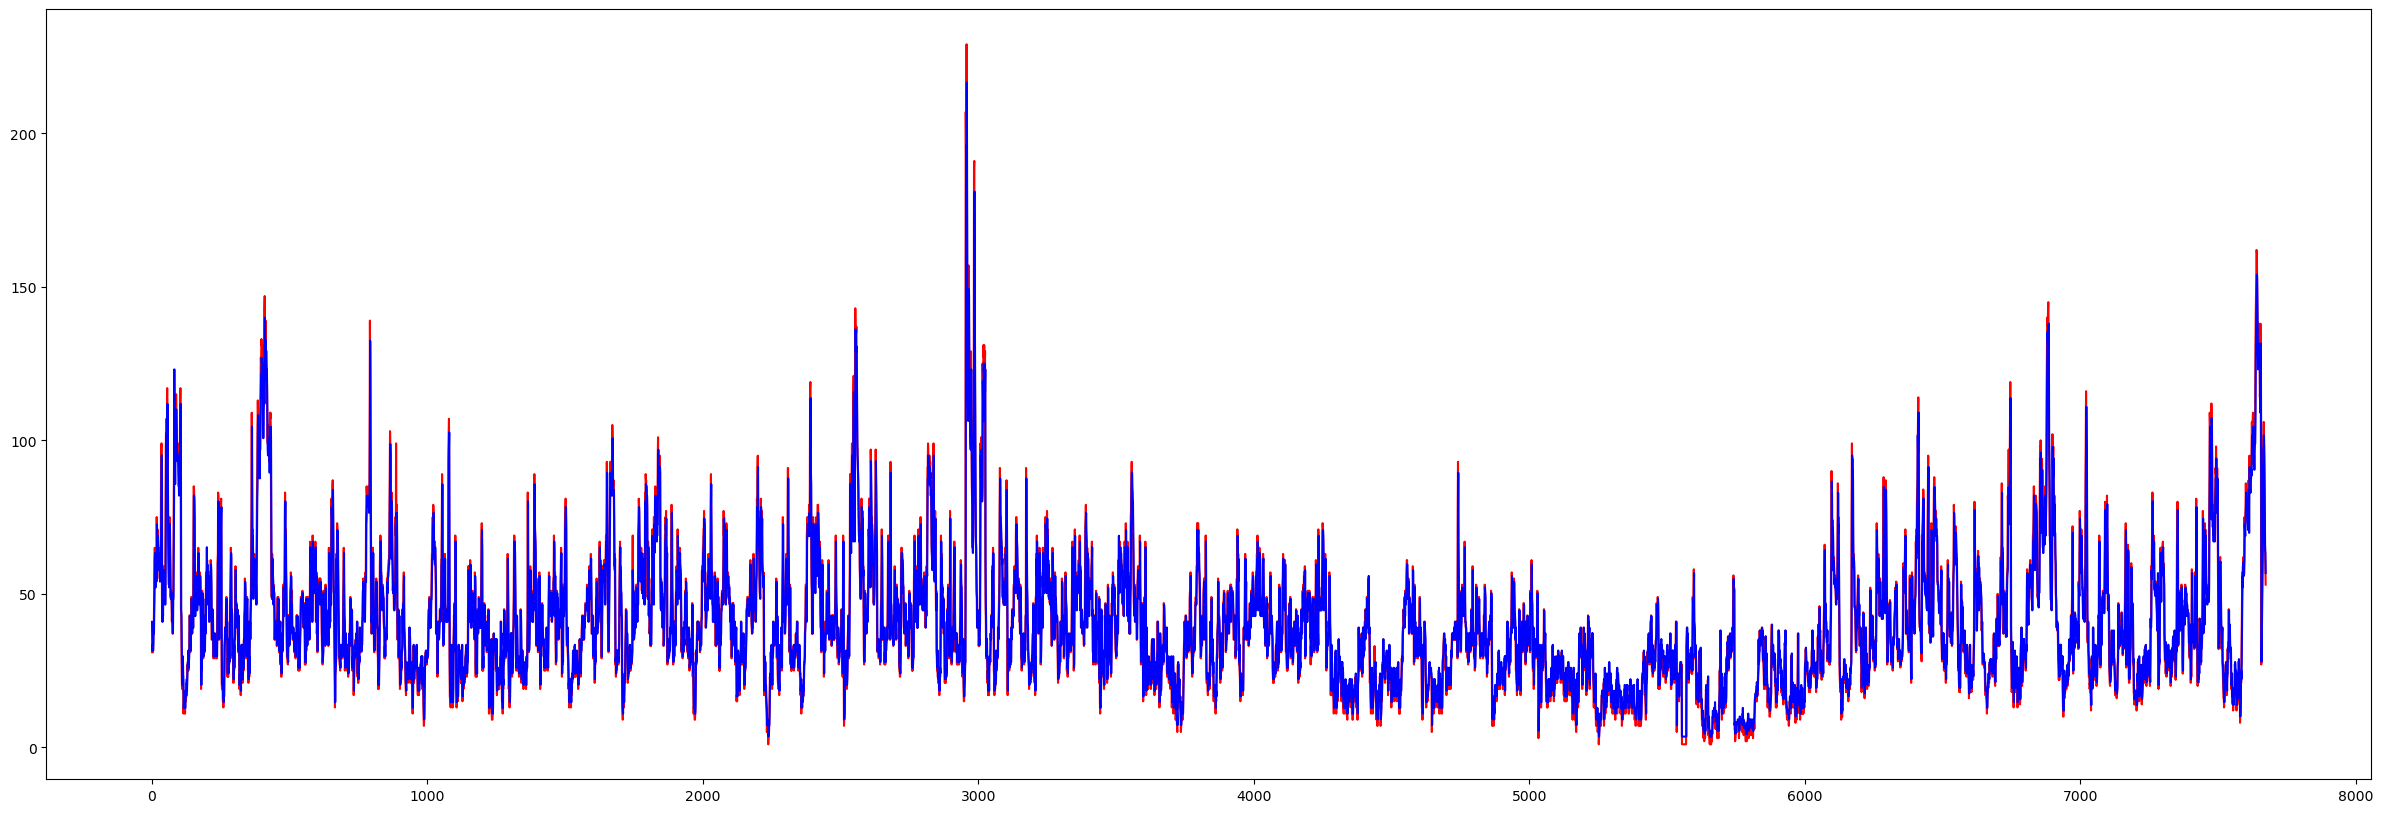

In [46]:
plt.figure(figsize=(30, 10))
plt.plot(X.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(X.reset_index().index, model.predict(X), color='blue',)

plt.show()

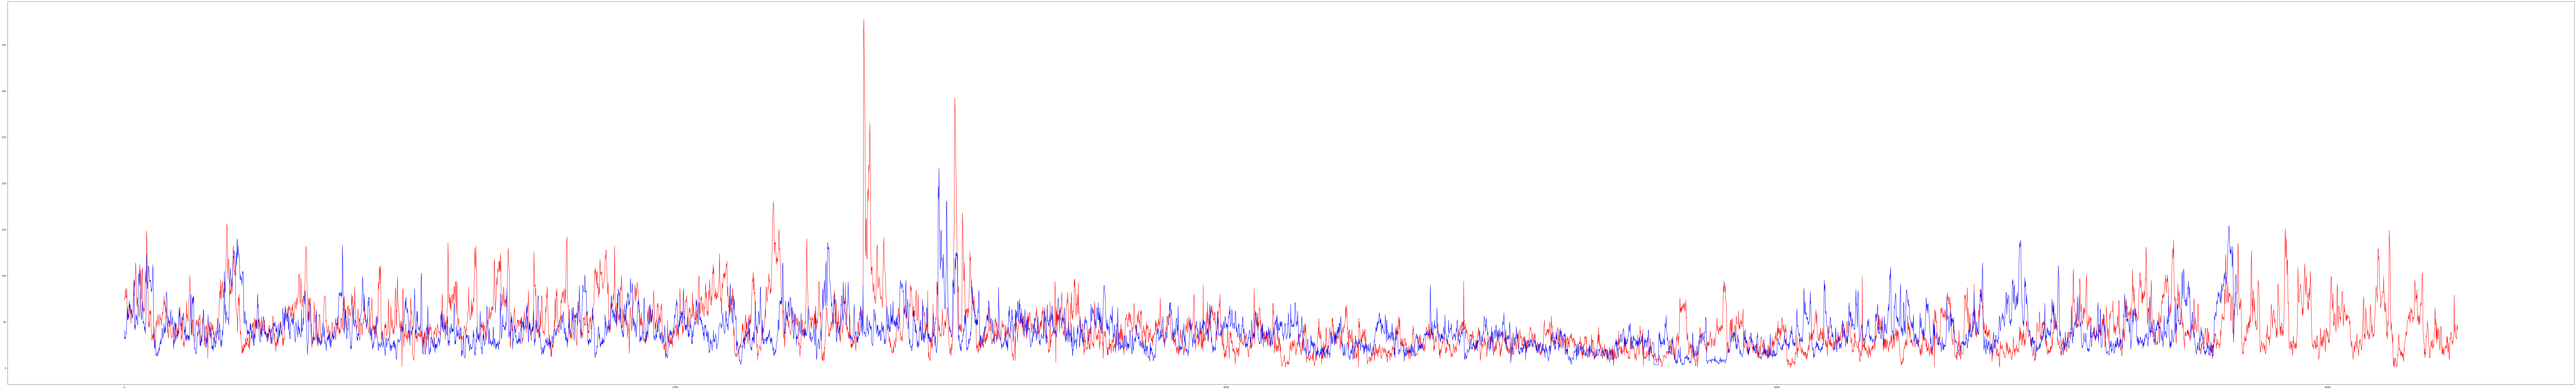

In [47]:
plt.figure(figsize=(200, 30))
plt.plot(JSDong_drop2.reset_index().index, JSDong_drop2['PM10_res'], color='red')
plt.plot(X2.reset_index().index, model.predict(X2), color='blue',)

plt.show()

In [48]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10) 
X = JSDong_drop[['PM10']].copy()
y = JSDong_drop[['PM10_res']].copy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [50]:
#z스코어 정규화
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train -= X_mean
X_train /= X_std
X_test -= X_mean
X_test /= X_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

print(X_train, y_train)

           PM10
21605  0.747518
89046  0.614391
2465   0.037509
54550 -0.938754
20175  1.901283
...         ...
34079 -0.228745
19416 -0.139994
45475 -0.761252
25290 -0.494998
32616  0.215011

[6139 rows x 1 columns]        PM10_res
21605  0.218874
89046  0.977051
2465  -0.048718
54550 -0.851493
20175  1.200044
...         ...
34079  0.129677
19416 -0.316310
45475 -0.405507
25290 -0.405507
32616 -0.227112

[6139 rows x 1 columns]


In [51]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, activation='relu', input_shape=(1,)),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 99 (396.00 Byte)
Trainable params: 99 (396.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

In [53]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8989 - val_loss: 0.5449
Epoch 2/100
154/154 [==============================] - 0s 401us/step - loss: 0.3899 - val_loss: 0.2150
Epoch 3/100
154/154 [==============================] - 0s 418us/step - loss: 0.1839 - val_loss: 0.1680
Epoch 4/100
154/154 [==============================] - 0s 420us/step - loss: 0.1544 - val_loss: 0.1513
Epoch 5/100
154/154 [==============================] - 0s 407us/step - loss: 0.1393 - val_loss: 0.1424
Epoch 6/100
154/154 [==============================] - 0s 374us/step - loss: 0.1301 - val_loss: 0.1365
Epoch 7/100
154/154 [==============================] - 0s 377us/step - loss: 0.1251 - val_loss: 0.1332
Epoch 8/100
154/154 [==============================] - 0s 379us/step - loss: 0.1226 - val_loss: 0.1334
Epoch 9/100
154/154 [==============================] - 0s 381us/step - loss: 0.1210 - val_loss: 0.1305
Epoch 10/100
154/154 [==============================] - 0s 384us/step - los

In [54]:
line_x = np.arange(min(X_test['PM10']), max(X_test['PM10']), 0.01)#.reshape(1, -1)
line_y=model.predict(line_x)

27/27 [==============================] - 0s 264us/step


In [95]:
len(JSDong[JSDong['PM10']>=120])

85

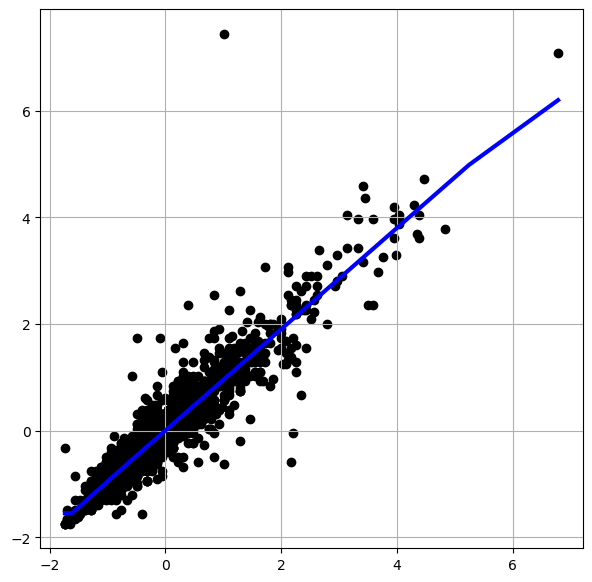

In [56]:
plt.figure(figsize=(7, 7))
plt.grid(True)

plt.scatter(X_test['PM10'], y_test['PM10_res'],  color='black')
#linex = [ [min(JSDong_drop['PM10'])], [max(JSDong_drop['PM10'])] ]
#line_x = np.arange(min(X_test['PM10']), max(X_test['PM10']), 0.01)
plt.plot(line_x, line_y, color='blue', linewidth=3)

plt.show()

In [117]:
y_pred = model.predict(X_test)
u = ((y_test - y_pred) ** 2).sum()
v = ((y_test - y_test.mean()) ** 2).sum()
R = 1 - (u / v)
R

48/48 [==============================] - 0s 373us/step


PM10_res    0.85503
dtype: float64

240/240 [==============================] - 0s 239us/step


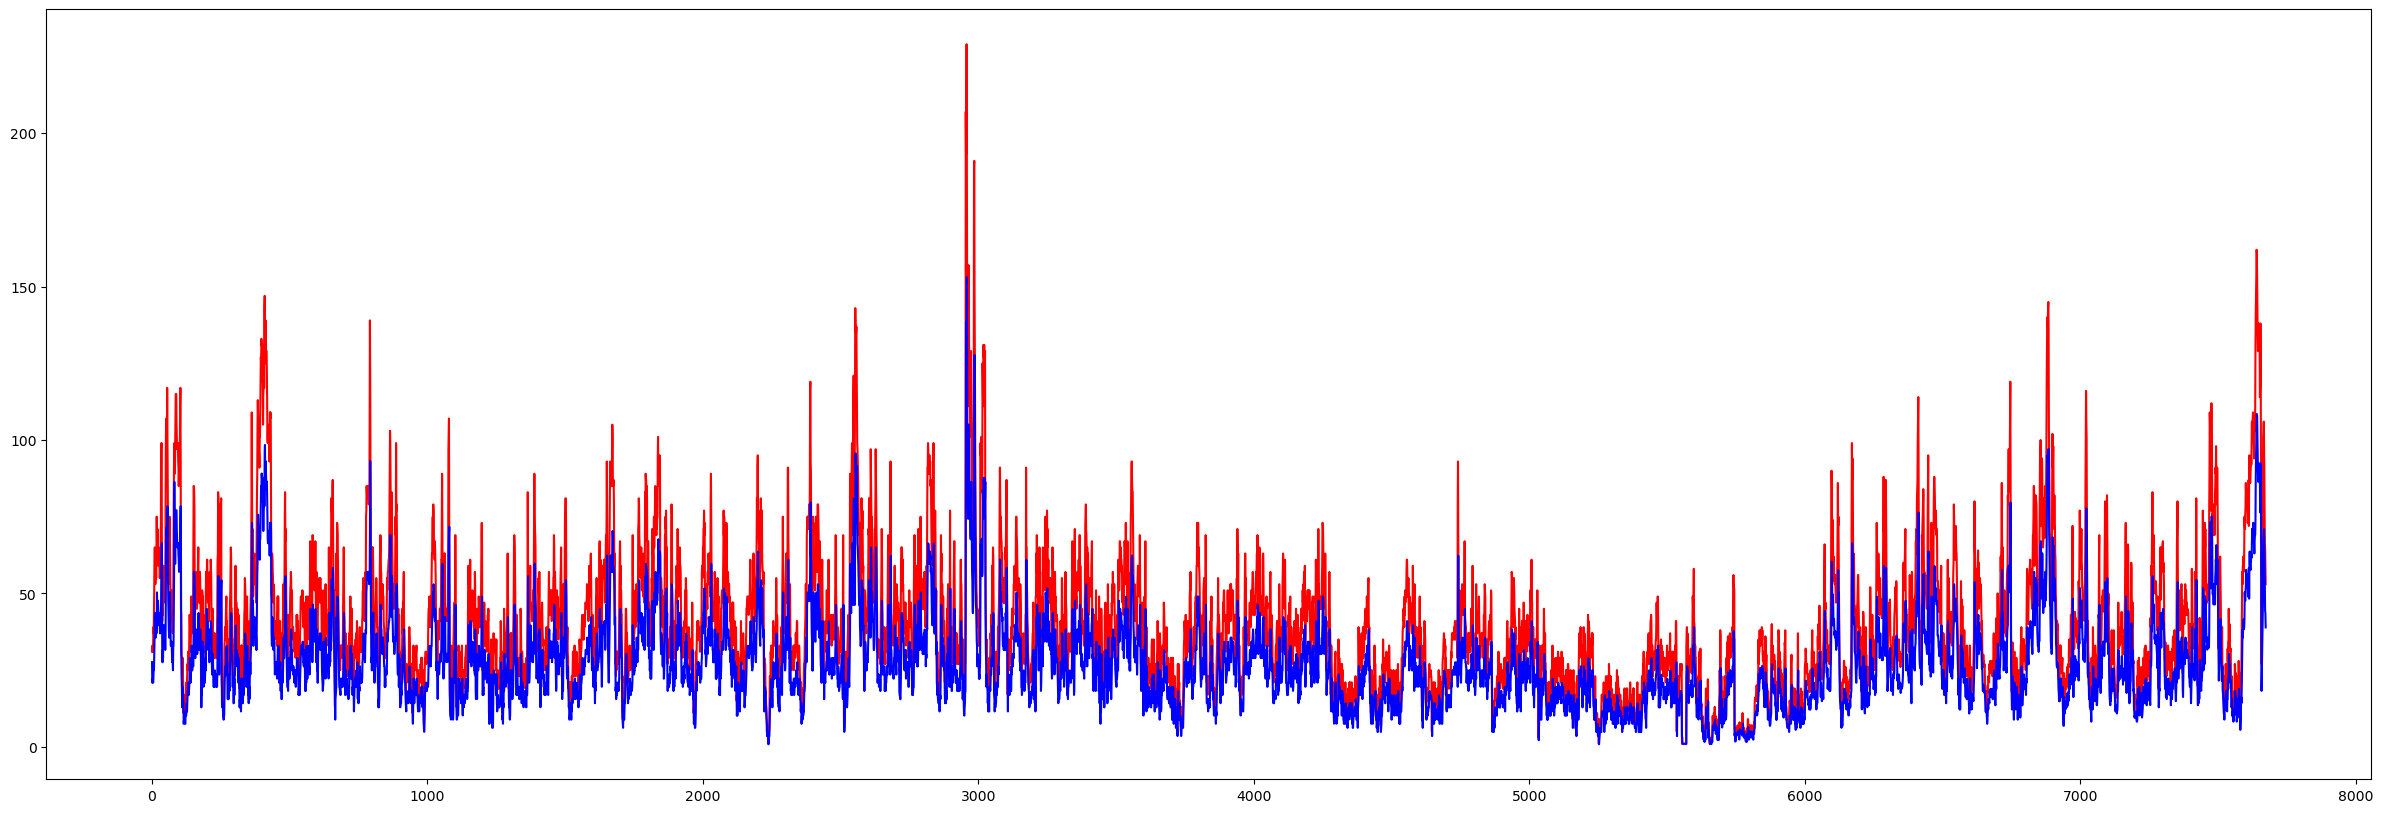

In [118]:
plt.figure(figsize=(30, 10))
plt.plot(y.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(y.reset_index().index, model.predict(X), color='blue',)

plt.show()

In [119]:
deepx_nor = X.copy()
deepx_nor -= X_mean
deepx_nor /= X_std
deepy_nor = y.copy()
deepy_nor -= y_mean
deepy_nor /= y_std

240/240 [==============================] - 0s 222us/step


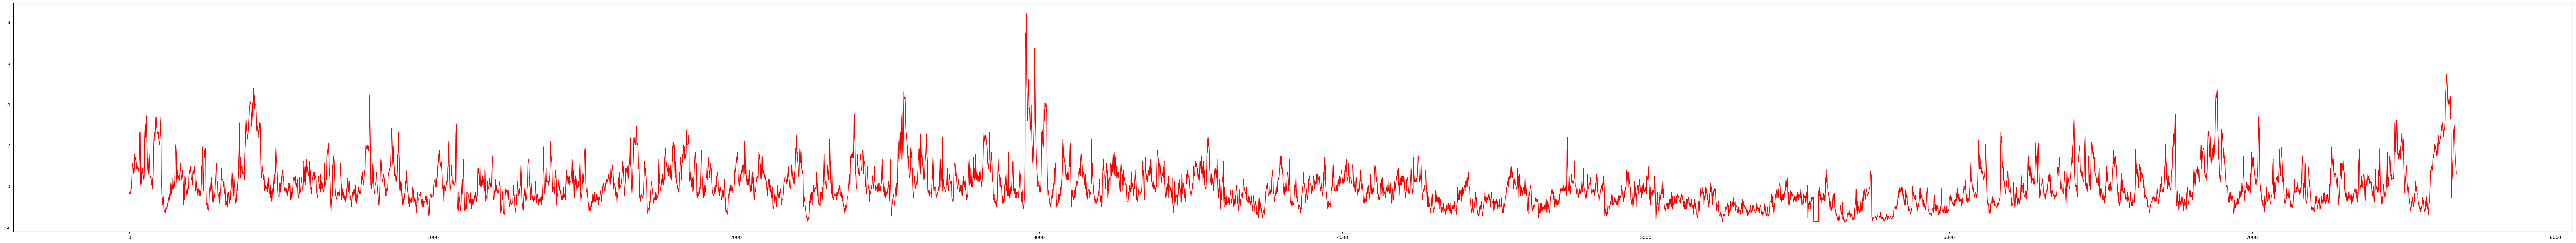

In [120]:
plt.figure(figsize=(100, 9))
plt.plot(y.reset_index().index, deepy_nor.reset_index()['PM10_res'], color='red')
plt.plot(y.reset_index().index, model.predict(deepx_nor), color='blue',)

plt.show()

240/240 [==============================] - 0s 247us/step


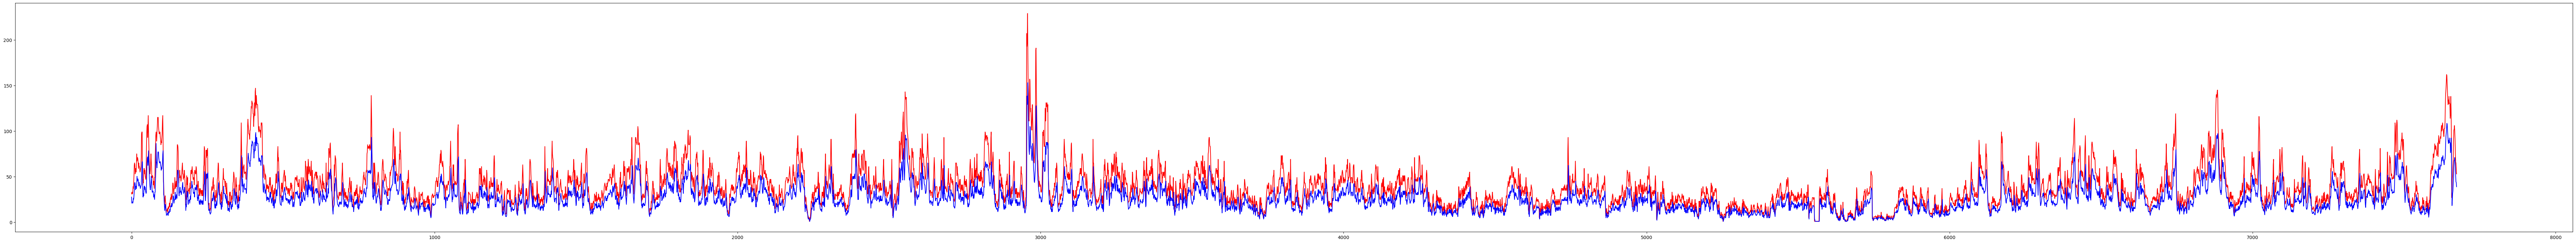

In [121]:
plt.figure(figsize=(100,9))
plt.plot(y.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(y.reset_index().index, model.predict(X), color='blue',)

plt.show()

In [62]:
#피쳐 추가 후 딥러닝
JSDong_drop.head(3)

측정소명     년  월  일  시    SO2  PM10  PM25     O3    NO2   CO  PM10_res  \
1   지산동  2017  1  1  1  0.003    41    30  0.004  0.054  0.6      31.0   
12  지산동  2017  1  1  2  0.003    31    30  0.004  0.052  0.6      33.0   
23  지산동  2017  1  1  3  0.003    33    30  0.003  0.055  0.6      33.0   

    PM25_res  
1       30.0  
12      30.0  
23      27.0

In [63]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10) 
X = JSDong_drop[['PM10', 'PM25', 'SO2', 'O3', 'NO2', 'CO']].copy()
y = JSDong_drop[['PM10_res']].copy()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [65]:
#minmax 정규화
min_X, max_X = X.min(axis=0), X.max(axis=0)
range_X = max_X - min_X

X_train -= min_X
X_train /= range_X
X_test -= min_X
X_test /= range_X

min_Y, max_Y = y.min(axis=0), y.max(axis=0)
range_Y = max_Y - min_Y
y_train -= min_Y
y_train /= range_Y
y_test -= min_Y
y_test /= range_Y

print(X_train, y_train)

           PM10      PM25       SO2        O3       NO2        CO
21605  0.245614  0.230769  0.007463  0.341270  0.152174  0.005391
89046  0.232456  0.299145  0.004975  0.007937  0.489130  0.024259
2465   0.175439  0.196581  0.007463  0.119048  0.000000  0.008086
54550  0.078947  0.076923  0.000000  0.404762  0.032609  0.000000
20175  0.359649  0.393162  0.014925  0.126984  0.304348  0.013477
...         ...       ...       ...       ...       ...       ...
34079  0.149123  0.213675  0.007463  0.158730  0.097826  0.005391
19416  0.157895  0.051282  0.007463  0.365079  0.043478  0.005391
45475  0.096491  0.162393  0.002488  0.182540  0.119565  0.005391
25290  0.122807  0.094017  0.007463  0.269841  0.239130  0.005391
32616  0.192982  0.153846  0.004975  0.468254  0.065217  0.002695

[6139 rows x 6 columns]        PM10_res
21605  0.192982
89046  0.267544
2465   0.166667
54550  0.087719
20175  0.289474
...         ...
34079  0.184211
19416  0.140351
45475  0.131579
25290  0.131579
32616  

In [66]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=6, activation='relu', input_shape=(6,)),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 8)                 56        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

In [68]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
154/154 [==============================] - 0s 707us/step - loss: 0.0086 - val_loss: 0.0022
Epoch 2/100
154/154 [==============================] - 0s 423us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/100
154/154 [==============================] - 0s 406us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/100
154/154 [==============================] - 0s 413us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/100
154/154 [==============================] - 0s 406us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
154/154 [==============================] - 0s 403us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/100
154/154 [==============================] - 0s 409us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
154/154 [==============================] - 0s 407us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
154/154 [==============================] - 0s 404us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
154/154 [==============================] - 0s 412us/step - l

In [69]:
y_pred = model.predict(X_test)
u = ((y_test - y_pred) ** 2).sum()
v = ((y_test - y_test.mean()) ** 2).sum()
R = 1 - (u / v)
R

48/48 [==============================] - 0s 269us/step


PM10_res    0.86474
dtype: float64

In [70]:
X_minmax = X.copy()
X_minmax -= min_X
X_minmax /=  range_X

In [71]:
model.predict(X_minmax)

240/240 [==============================] - 0s 262us/step


array([[0.20059156],
       [0.16185917],
       [0.17063786],
       ...,
       [0.2778379 ],
       [0.27097806],
       [0.2442741 ]], dtype=float32)

In [72]:
range_Y

PM10_res    228.0
dtype: float64

In [73]:
min_Y

PM10_res    1.0
dtype: float64

In [74]:
model.predict(X_minmax)*range_Y.values+min_Y.values

240/240 [==============================] - 0s 257us/step


array([[46.73487663],
       [37.90389067],
       [39.90543228],
       ...,
       [64.34704173],
       [62.78299844],
       [56.69449359]])

240/240 [==============================] - 0s 249us/step


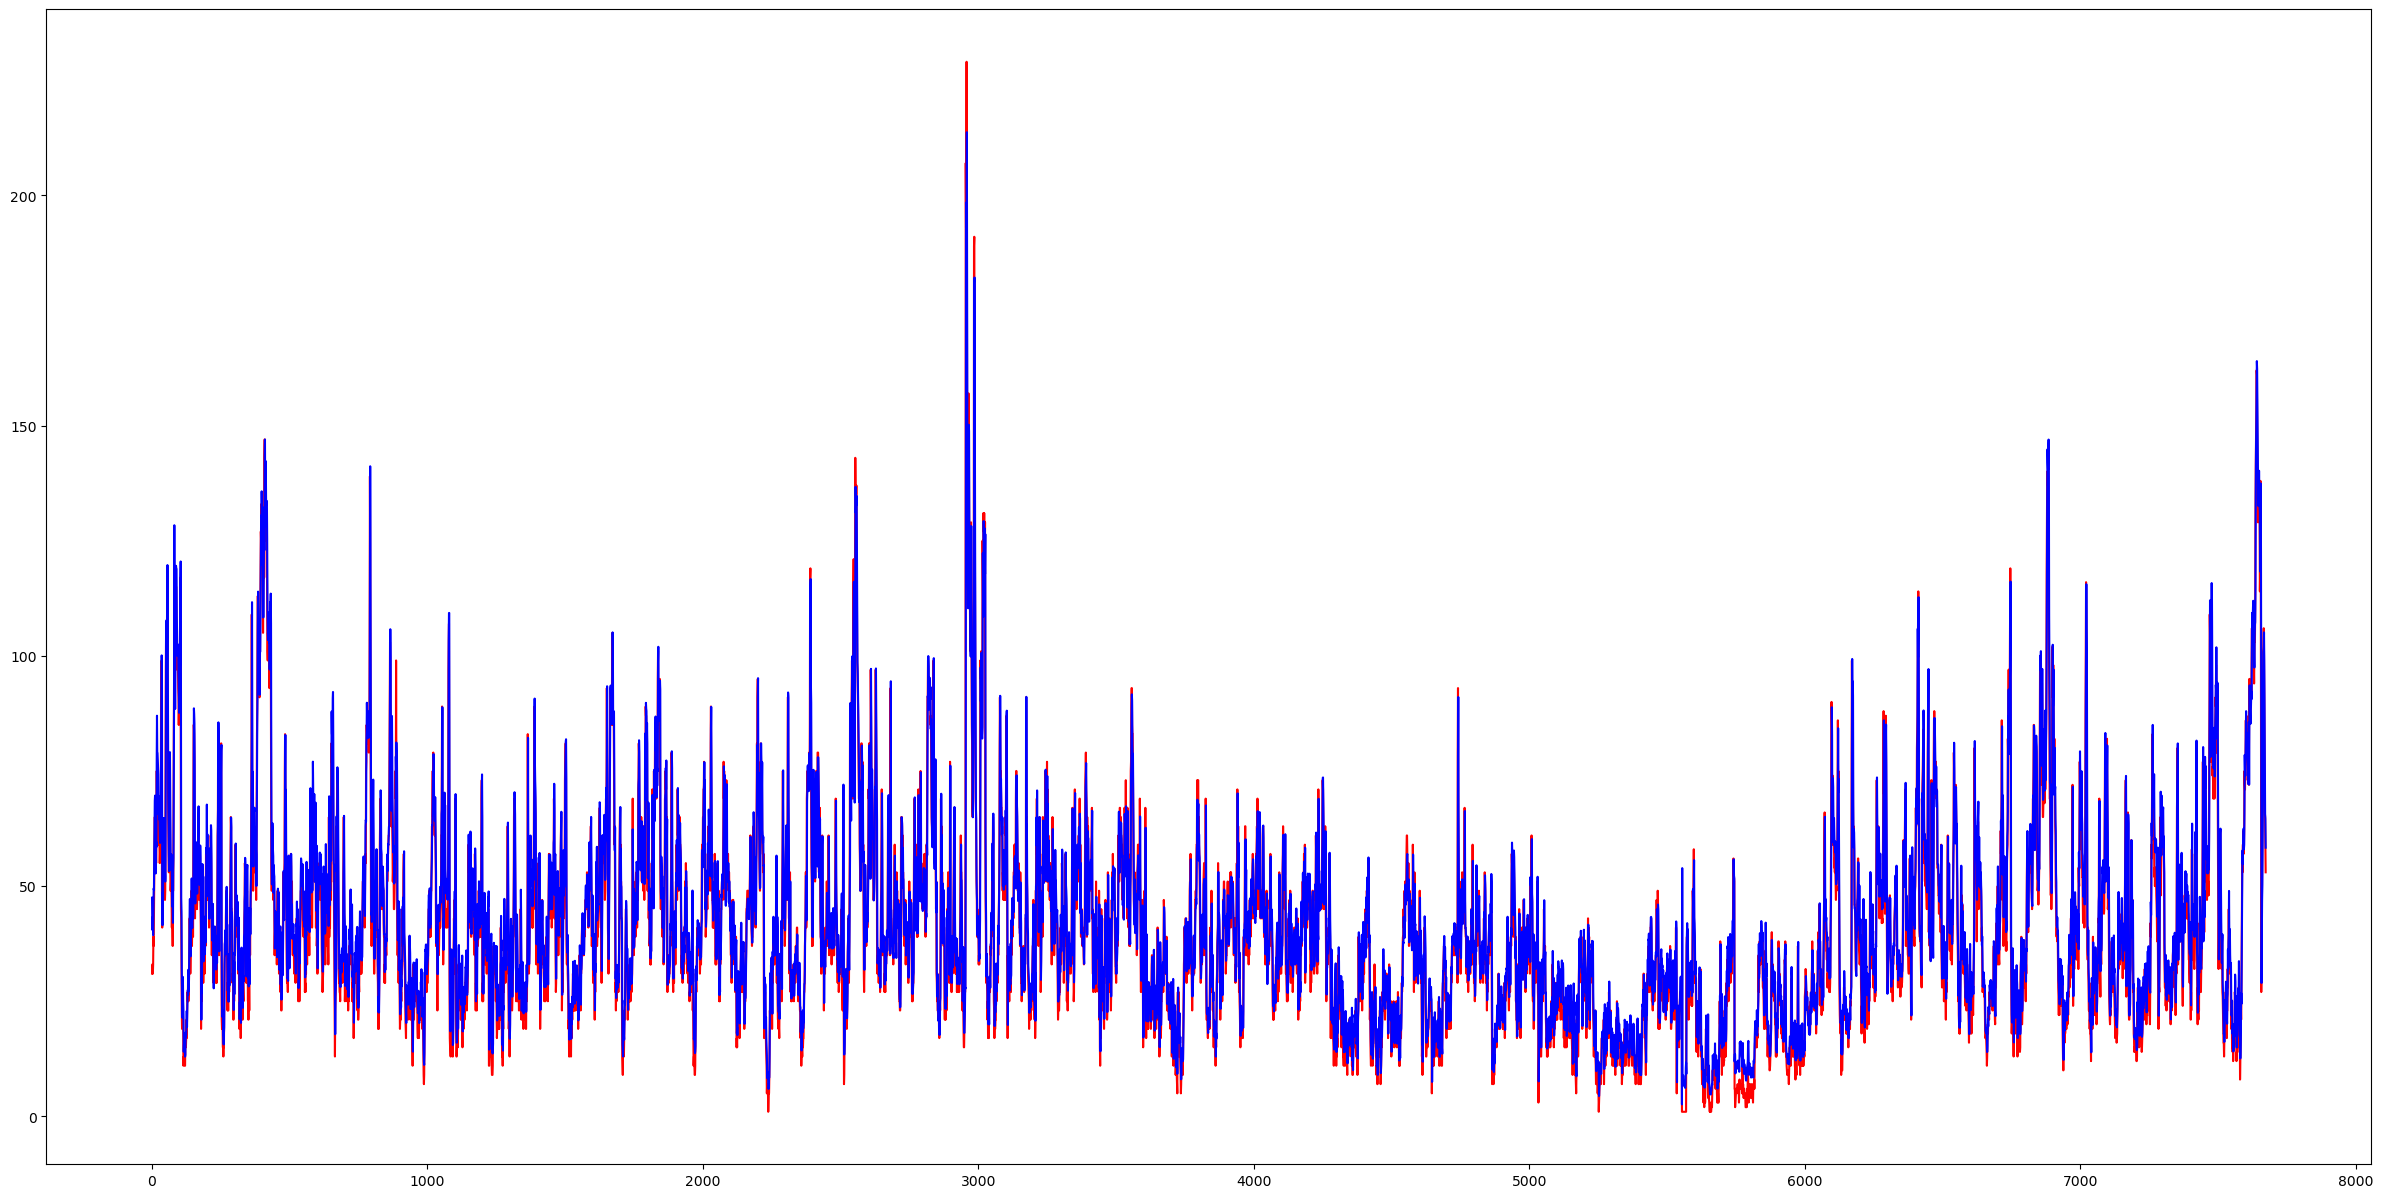

In [116]:
plt.figure(figsize=(30, 15))
plt.plot(y.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(y.reset_index().index, model.predict(X_minmax)*range_Y.values+min_Y.values, color='blue',)

plt.show()

In [76]:
#피쳐 추가 후 딥러닝
JSDong_drop.head(3)

측정소명     년  월  일  시    SO2  PM10  PM25     O3    NO2   CO  PM10_res  \
1   지산동  2017  1  1  1  0.003    41    30  0.004  0.054  0.6      31.0   
12  지산동  2017  1  1  2  0.003    31    30  0.004  0.052  0.6      33.0   
23  지산동  2017  1  1  3  0.003    33    30  0.003  0.055  0.6      33.0   

    PM25_res  
1       30.0  
12      30.0  
23      27.0

In [77]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10) 
X = JSDong_drop[['PM10', 'SO2', 'O3', 'NO2', 'CO']].copy()
y = JSDong_drop[['PM10_res']].copy()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [79]:
#minmax 정규화
min_X, max_X = X.min(axis=0), X.max(axis=0)
range_X = max_X - min_X

X_train -= min_X
X_train /= range_X
X_test -= min_X
X_test /= range_X

min_Y, max_Y = y.min(axis=0), y.max(axis=0)
range_Y = max_Y - min_Y
y_train -= min_Y
y_train /= range_Y
y_test -= min_Y
y_test /= range_Y

print(X_train, y_train)

           PM10       SO2        O3       NO2        CO
21605  0.245614  0.007463  0.341270  0.152174  0.005391
89046  0.232456  0.004975  0.007937  0.489130  0.024259
2465   0.175439  0.007463  0.119048  0.000000  0.008086
54550  0.078947  0.000000  0.404762  0.032609  0.000000
20175  0.359649  0.014925  0.126984  0.304348  0.013477
...         ...       ...       ...       ...       ...
34079  0.149123  0.007463  0.158730  0.097826  0.005391
19416  0.157895  0.007463  0.365079  0.043478  0.005391
45475  0.096491  0.002488  0.182540  0.119565  0.005391
25290  0.122807  0.007463  0.269841  0.239130  0.005391
32616  0.192982  0.004975  0.468254  0.065217  0.002695

[6139 rows x 5 columns]        PM10_res
21605  0.192982
89046  0.267544
2465   0.166667
54550  0.087719
20175  0.289474
...         ...
34079  0.184211
19416  0.140351
45475  0.131579
25290  0.131579
32616  0.149123

[6139 rows x 1 columns]


In [80]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=20, activation='relu', input_shape=(5,)),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                120       
                                                                 
 dense_10 (Dense)            (None, 16)                336       
                                                                 
 dense_11 (Dense)            (None, 12)                204       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 773 (3.02 KB)
Trainable params: 773 (3.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

In [82]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
154/154 [==============================] - 0s 736us/step - loss: 0.0051 - val_loss: 0.0014
Epoch 2/100
154/154 [==============================] - 0s 493us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/100
154/154 [==============================] - 0s 484us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/100
154/154 [==============================] - 0s 519us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/100
154/154 [==============================] - 0s 553us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
154/154 [==============================] - 0s 513us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/100
154/154 [==============================] - 0s 542us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
154/154 [==============================] - 0s 486us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/100
154/154 [==============================] - 0s 535us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
154/154 [==============================] - 0s 469us/step - l

In [83]:
y_pred = model.predict(X_test)
u = ((y_test - y_pred) ** 2).sum()
v = ((y_test - y_test.mean()) ** 2).sum()
R = 1 - (u / v)
R

48/48 [==============================] - 0s 294us/step


PM10_res    0.85503
dtype: float64

In [84]:
X_minmax = X.copy()
X_minmax -= min_X
X_minmax /=  range_X

In [85]:
model.predict(X_minmax)

240/240 [==============================] - 0s 224us/step


array([[0.20390347],
       [0.17325228],
       [0.18519323],
       ...,
       [0.28354502],
       [0.27886105],
       [0.25151724]], dtype=float32)

In [86]:
model.predict(X_minmax)*range_Y.values+min_Y.values

240/240 [==============================] - 0s 222us/step


array([[47.48999035],
       [40.50152087],
       [43.22405547],
       ...,
       [65.64826393],
       [64.58031845],
       [58.34592986]])

240/240 [==============================] - 0s 266us/step


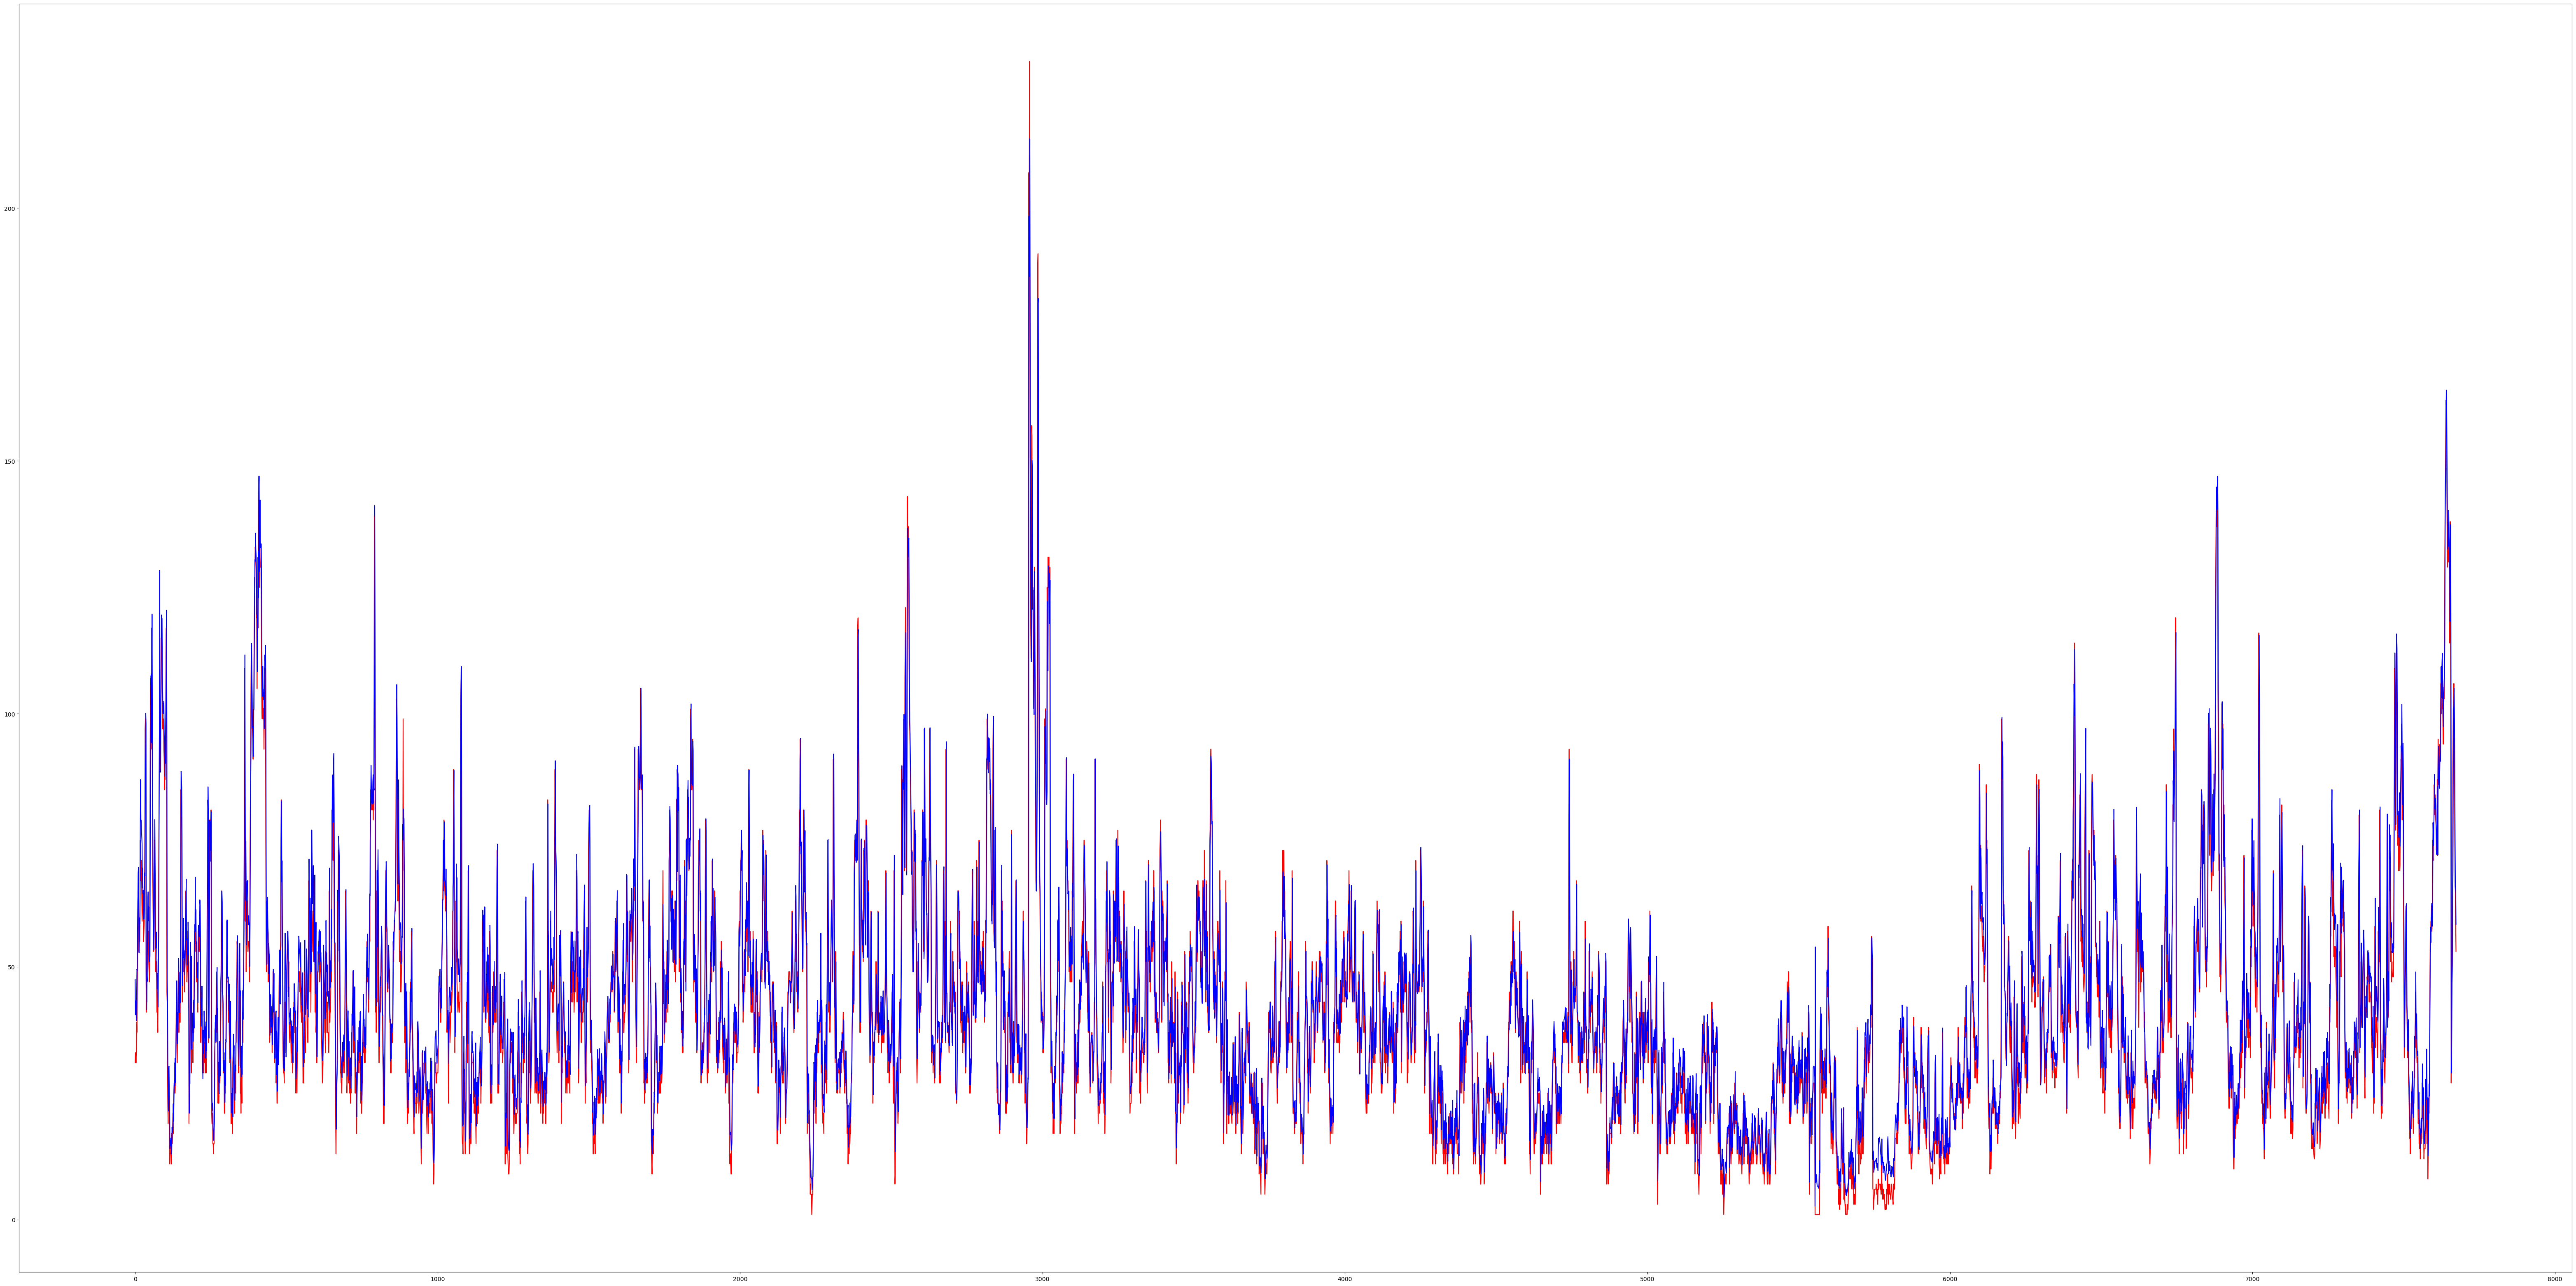

In [123]:
plt.figure(figsize=(80, 40))
plt.plot(y.reset_index().index, y.reset_index()['PM10_res'], color='red')
plt.plot(y.reset_index().index, model.predict(X_minmax)*range_Y.values+min_Y.values, color='blue',)

plt.show()